<a href="https://colab.research.google.com/github/ericmuga253/ML_2/blob/main/week3project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing data

In [8]:
!pip install liac-arff
import pandas as pd
import arff # import the arff module

# Read ARFF file as text
with open('/content/modified_dataset.arff', 'r') as file:
    lines = file.readlines()

# Find the @DATA line to determine where the data starts
data_start_idx = None
for i, line in enumerate(lines):
    if line.strip().lower() == '@data':
        data_start_idx = i + 1
        break

# Get the number of attributes
num_attributes = sum(1 for line in lines if line.strip().lower().startswith('@attribute'))

# Clean up the data lines
cleaned_lines = []
for i, line in enumerate(lines[data_start_idx:], start=data_start_idx):
    if len(line.split(',')) == num_attributes:
        cleaned_lines.append(line)
    else:
        print(f"Skipped line {i+1}: {line.strip()}")

# Write the cleaned file
cleaned_content = ''.join(lines[:data_start_idx] + cleaned_lines)
with open('/content/cleaned_dataset.arff', 'w') as file:
    file.write(cleaned_content)

# Load the cleaned ARFF file
dataset = arff.load(open('/content/cleaned_dataset.arff', 'r'))

# Convert to DataFrame
air = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
air.head()


Skipped line 157153: 16874,2015,2,2,1,167.0,167.0,81.0,112.0,3200.0,2.0,-3.8,1029.8,


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [9]:
air.info

<bound method DataFrame.info of            No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
0           1  2013      3    1     0    4.0    4.0   4.0    7.0   300.0   
1           2  2013      3    1     1    8.0    8.0   4.0    7.0   300.0   
2           3  2013      3    1     2    7.0    7.0   5.0   10.0   300.0   
3           4  2013      3    1     3    6.0    6.0  11.0   11.0   300.0   
4           5  2013      3    1     4    3.0    3.0  12.0   12.0   300.0   
...       ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
157124  16869  2015      2    1    20  125.0  142.0  72.0  107.0  2300.0   
157125  16870  2015      2    1    21  124.0  133.0  74.0  106.0  2200.0   
157126  16871  2015      2    1    22  123.0  125.0  81.0  105.0  2200.0   
157127  16872  2015      2    1    23  132.0  132.0  76.0  105.0  2300.0   
157128  16873  2015      2    2     0  143.0  143.0  77.0  107.0  2600.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0       77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1       77.0  -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2       73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3       72.0  -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4       72.0  -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...      ...   ...     ...   ...   ...  ...   ...           ...  
157124   2.0  -2.0  1027.0 -14.1   0.0    W   0.8      Guanyuan  
157125   2.0  -4.0  1028.0 -15.3   0.0   SE   0.0      Guanyuan  
157126   2.0  -5.0  1025.0 -16.2   0.0   SW   0.8      Guanyuan  
157127   2.0  -5.0  1025.0 -17.2   0.0   SE   0.3      Guanyuan  
157128   2.0  -6.0  1030.0 -17.7   0.0  ESE   0.4      Guanyuan  

[157129 rows x 18 columns]>

In [11]:
import pandas as pd

# Assuming 'air' is the DataFrame from the previous code block
air_sorted = air.sort_values(by=['year', 'month', 'day', 'hour']) # Create and assign the air_sorted DataFrame

# Creating a DatetimeIndex
air_sorted['datetime'] = pd.to_datetime(air_sorted[['year', 'month', 'day', 'hour']])

# Setting the DatetimeIndex
air_sorted.set_index('datetime', inplace=True)

# Dropping the original year, month, day, and hour columns if not needed
air_sorted.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Interpolating the missing values with the time method
air_interpolated = air_sorted.infer_objects().interpolate(method='time')

# Checking if all missing values have been filled
print(air_interpolated.isnull().sum())

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-11-44267d90c924>:16: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  air_interpolated = air_sorted.infer_objects().interpolate(method='time')


In [12]:
air_sorted.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01,1,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
2013-03-01,1,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan


In [13]:
air_sorted.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,157129.000000,153581.000000,154407.000000,153859.00000,152127.000000,147154.000000,151929.000000,156982.000000,156988.000000,156982.000000,156986.000000,157014.000000
mean,16555.796963,77.525778,101.008186,16.47626,47.898769,1177.009711,59.464121,13.684777,1010.030840,2.379382,0.062778,1.785967
std,10096.177792,78.914866,89.866896,22.02059,34.637725,1118.671682,56.384468,11.368011,10.483725,13.792786,0.814133,1.268374
min,1.000000,2.000000,2.000000,0.28560,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,7857.000000,19.000000,34.000000,3.00000,21.000000,500.000000,14.000000,3.300000,1001.500000,-9.100000,0.000000,1.000000
50%,15713.000000,53.000000,78.000000,8.00000,40.000000,800.000000,48.000000,14.700000,1009.700000,2.900000,0.000000,1.400000
75%,25244.000000,109.000000,141.000000,20.00000,68.000000,1500.000000,84.000000,23.300000,1018.300000,15.000000,0.000000,2.300000
max,35064.000000,898.000000,999.000000,341.00000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,11.200000


Perfoming ADF test to determine stationarity

Performing Auto arima

In [15]:
!pip install pmdarima
import pmdarima as pm
import pandas as pd

# Assuming 'air_sorted' is your DataFrame and 'PM2.5' is the target variable
# Extract the PM2.5 time series
pm25_series = air_sorted['PM2.5'].dropna()  # Drop NaNs if any

# Fit autoARIMA with limits
model = pm.auto_arima(
    pm25_series,
    start_p=0,          # Starting point for p
    start_q=0,          # Starting point for q
    max_p=3,            # Maximum value for p
    max_d=2,            # Maximum value for d
    max_q=3,            # Maximum value for q
    start_P=0,          # Starting point for seasonal P (if seasonal=True)
    start_Q=0,          # Starting point for seasonal Q (if seasonal=True)
    max_P=2,            # Maximum value for seasonal P
    max_D=1,            # Maximum value for seasonal D
    max_Q=2,            # Maximum value for seasonal Q
    m=12,               # Seasonal period (e.g., 12 for monthly data)
    seasonal=False,     # Set to True if your data has a seasonal component
    stepwise=True,      # Use stepwise algorithm to search for the best model
    trace=True,         # Print progress
    error_action='ignore',  # Ignore errors and continue
    suppress_warnings=True,  # Suppress warnings
    n_fits=50           # Maximum number of models to try
)

# Display the summary of the best model
print(model.summary())


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1561421.959, Time=3.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1549920.665, Time=5.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1492815.706, Time=25.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1561419.959, Time=2.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1492533.522, Time=52.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1457811.109, Time=66.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1507920.404, Time=15.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1432837.375, Time=69.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1447343.903, Time=17.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1421440.643, Time=114.73 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1423920.549, Time=76.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1420811.490, Time=167.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1422167.821, Time=137.80 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=14208

Fitting Auto Arima recomended model and evaluating performance

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:               122864
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -568173.217
Date:                Wed, 28 Aug 2024   AIC                        1136360.434
Time:                        22:20:36   BIC                        1136428.466
Sample:                             0   HQIC                       1136380.891
                             - 122864                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1773      0.005     35.140      0.000       0.167       0.187
ar.L2         -0.6246      0.002   -286.342      0.000      -0.629      -0.620
ar.L3         -0.2352      0.003    -68.779      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 6825.428541669654


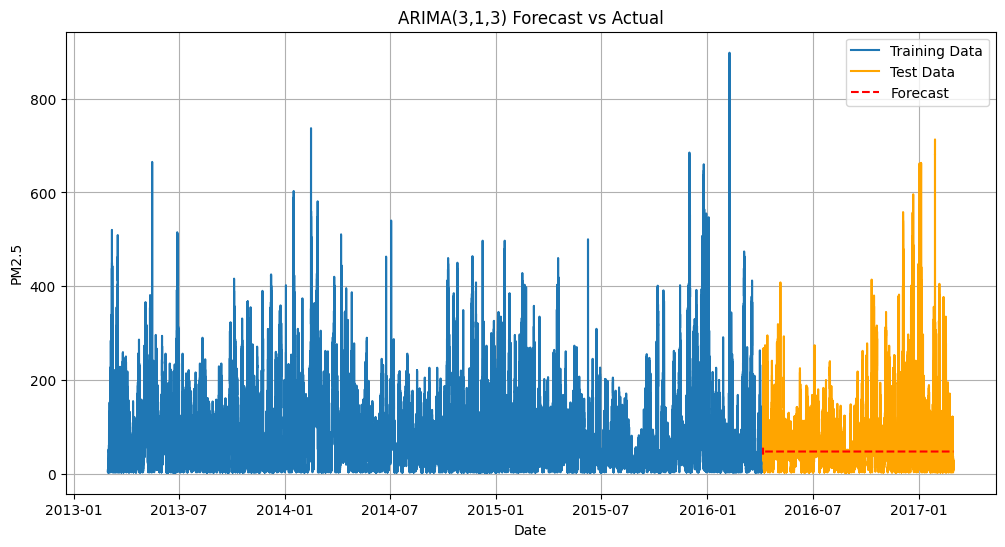

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming 'air_sorted' is your DataFrame and 'PM2.5' is the target variable
# Extract the PM2.5 time series
pm25_series = air_sorted['PM2.5'].dropna()  # Drop NaNs if any

# Split the data into training and testing sets
train_size = int(len(pm25_series) * 0.8)
train, test = pm25_series[:train_size], pm25_series[train_size:]

# Fit the ARIMA(3,1,3) model on the training data
model = ARIMA(train, order=(3, 1, 3))
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

# Forecast on the test set
forecast = fitted_model.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error (MSE): {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.legend()
plt.title('ARIMA(3,1,3) Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()
